## Assignments

Now that you have some code to create your own populations, sample them, and compare the samples to the populations, it's time to experiment. Using your own Jupyter notebook, or a copy of the notebook above, reproduce the pop1 and pop2 populations and samples using numpy's binomial function. Specifically, create two binomially distributed populations with n equal to 10 and size equal to 10000. The p-value of pop1 should be 0.2 and the p-value of pop2 should be 0.5. Using a sample size of 100, calculate the means and standard deviations of your samples.

1. For each of the following tasks, first write what you expect will happen, then code the changes and observe what does happen. Discuss the results with your mentor.

2. Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?

3. Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the probability value p for group 1 to 0.4, and do it again. What changes, and why?

4. Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?




In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

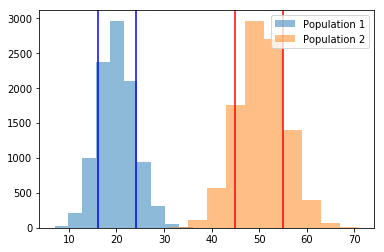

In [2]:
pop1 = np.random.binomial(100, 0.2, 10000)
pop2 = np.random.binomial(100,0.5, 10000) 

# Let’s make histograms for the two groups. 

plt.hist(pop1, alpha=0.5, label='Population 1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right') 

mean1 = np.mean(pop1)
sd1 = np.std(pop1)
mean2 = np.mean(pop2)
sd2 = np.std(pop2)

plt.axvline(x=mean1+sd1, color='blue')
plt.axvline(x=mean1-sd1, color='blue')
plt.axvline(x=mean2+sd2, color='red')
plt.axvline(x=mean2-sd2, color='red')

plt.show()



In [17]:
from scipy.stats import ttest_ind
ttest_ind(pop1, pop2, equal_var=False)

Ttest_indResult(statistic=-462.52261894162734, pvalue=0.0)

In [26]:
def my_ttest(samp1,samp2):
    size = np.array([len(samp1), len(samp2)])
    sd = np.array([samp1.std(), samp2.std()])
    # The squared standard deviations are divided by the sample size and summed, then we take
    # the square root of the sum. 
    diff=samp2.mean( ) -samp1.mean()
    diff_se = (sum(sd ** 2 / size)) ** 0.5  
    #The difference between the means divided by the standard error: T-value.  
    ttest = diff/diff_se
    return ttest

def plot_disttest(nsamp=100,n=100,p1=0.2,p2=0.5):
    # is binomial... will generalize later
    pop1 = np.random.binomial(n, p1, nsamp)
    pop2 = np.random.binomial(n, p2, nsamp)
    plt.hist(pop1, alpha=0.5, label='Population 1') 
    plt.hist(pop2, alpha=0.5, label='Population 2') 
    plt.legend(loc='upper right') 
    #ttest_ind(pop1, pop2, equal_var=False)
    tstat = my_ttest(pop1,pop2);
    mean1 = np.mean(pop1)
    sd1 = np.std(pop1)
    mean2 = np.mean(pop2)
    sd2 = np.std(pop2)
    plt.axvline(x=mean1+sd1, color='blue')
    plt.axvline(x=mean1-sd1, color='blue')
    plt.axvline(x=mean2+sd2, color='red')
    plt.axvline(x=mean2-sd2, color='red')
    title_str = 'population size = {0}, p={1:.2f},{2:.2f}, t={3:.2f}'.format(nsamp,p1,p2,tstat)
    plt.title( title_str )


# Effect of changing number of samples  

The sample mean and and sample variance estimate is consistent regardless of number of samples.  Just subtle shifts due to randomness in the "data".

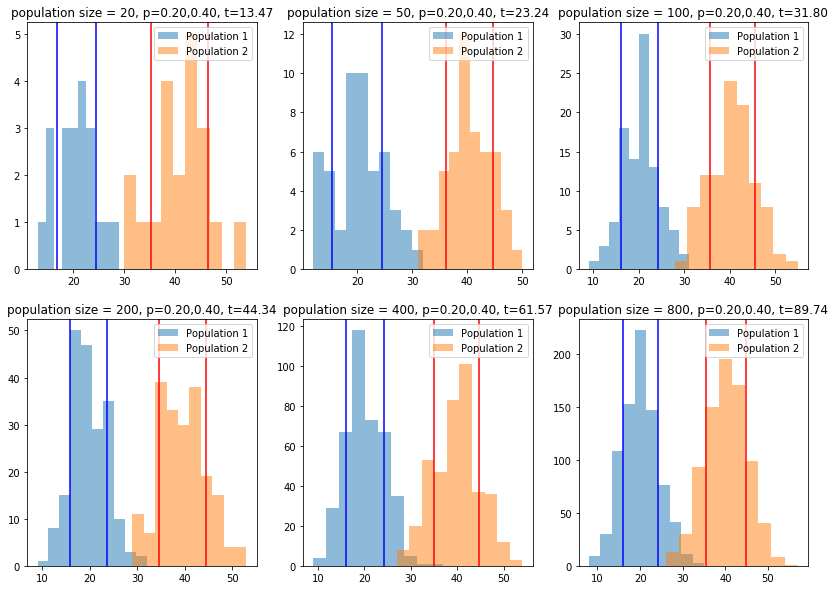

In [27]:

plt.subplot(2,3,1)
plot_disttest(nsamp=20,n=100,p1=0.2,p2=0.4)

plt.subplot(2,3,2)
plot_disttest(nsamp=50,n=100,p1=0.2,p2=0.4)

plt.subplot(2,3,3)
plot_disttest(nsamp=100,n=100,p1=0.2,p2=0.4)

plt.subplot(2,3,4)
plot_disttest(nsamp=200,n=100,p1=0.2,p2=0.4)

plt.subplot(2,3,5)
plot_disttest(nsamp=400,n=100,p1=0.2,p2=0.4)

plt.subplot(2,3,6)
plot_disttest(nsamp=800,n=100,p1=0.2,p2=0.4)

fig = plt.gcf()
fig.set_size_inches(14,10)
plt.show()

    

# Effect of changing Binomial p parameter

Changing the p, so the two distributions are more alike reduces the t-statistic.

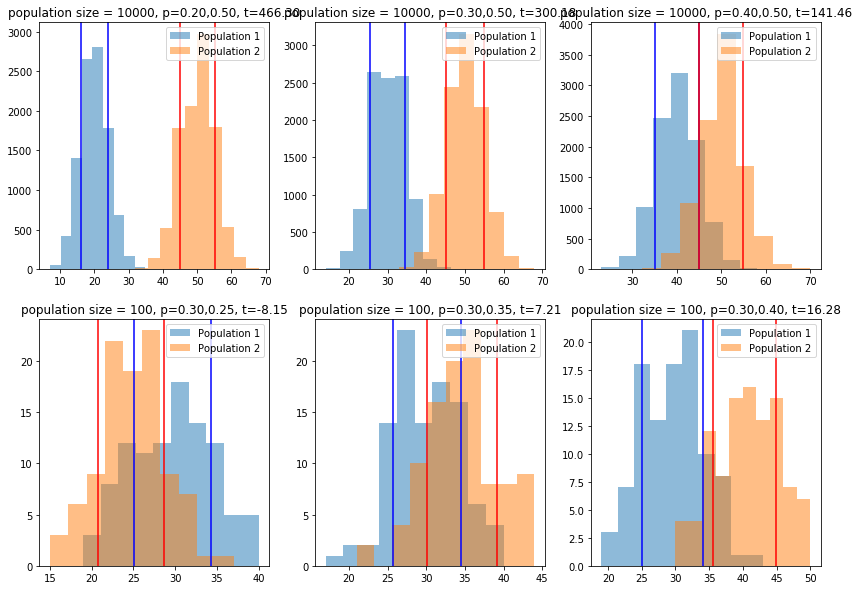

In [10]:

plt.subplot(2,3,1)
plot_disttest(nsamp=10000,n=100,p1=0.2,p2=0.5)
plt.subplot(2,3,2)
plot_disttest(nsamp=10000,n=100,p1=0.3,p2=0.5)
plt.subplot(2,3,3)
plot_disttest(nsamp=10000,n=100,p1=0.4,p2=0.5)

plt.subplot(2,3,4)
plot_disttest(nsamp=100,n=100,p1=0.2,p2=0.4)
plt.subplot(2,3,5)
plot_disttest(nsamp=100,n=100,p1=0.3,p2=0.5)
plt.subplot(2,3,6)
plot_disttest(nsamp=100,n=100,p1=0.4,p2=0.5)

fig = plt.gcf()
fig.set_size_inches(14,10)

plt.show()

# other distributions
Using a different distrubution (e.g. Gamma) does not change the rsults.  The sample means are 

## . Gamma
The probability density for the Gamma distribution is
where k is the shape and $\theta$ the scale, and $\Gamma$ is the Gamma function.
\begin{equation}
p(x) = x^{k-1}\frac{e^{-x/\theta}}{\theta^k\Gamma(k)},
\end{equation}

In [28]:
def plot_gamma_disttest(nsamp=100,shape1=2.,shape2=3.,scale1=2.,scale2=2.):
    pop1 = np.random.gamma(shape1, scale1, nsamp)
    pop2 = np.random.gamma(shape2, scale2, nsamp)
    plt.hist(pop1, alpha=0.5, label='Population 1') 
    plt.hist(pop2, alpha=0.5, label='Population 2') 
    plt.legend(loc='upper right') 
    tstat = my_ttest(pop1,pop2);
    mean1 = np.mean(pop1)
    sd1 = np.std(pop1)
    mean2 = np.mean(pop2)
    sd2 = np.std(pop2)
    plt.axvline(x=mean1+sd1, color='blue')
    plt.axvline(x=mean1-sd1, color='blue')
    plt.axvline(x=mean2+sd2, color='red')
    plt.axvline(x=mean2-sd2, color='red')
    title_str = 'population size = {0}, shape={1:.1f},{2:.1f},scale={3:.1f},{4:.1f},t={5:.2f}'.format(
        nsamp,shape1,shape2,scale1,scale2,tstat)
    plt.title( title_str )


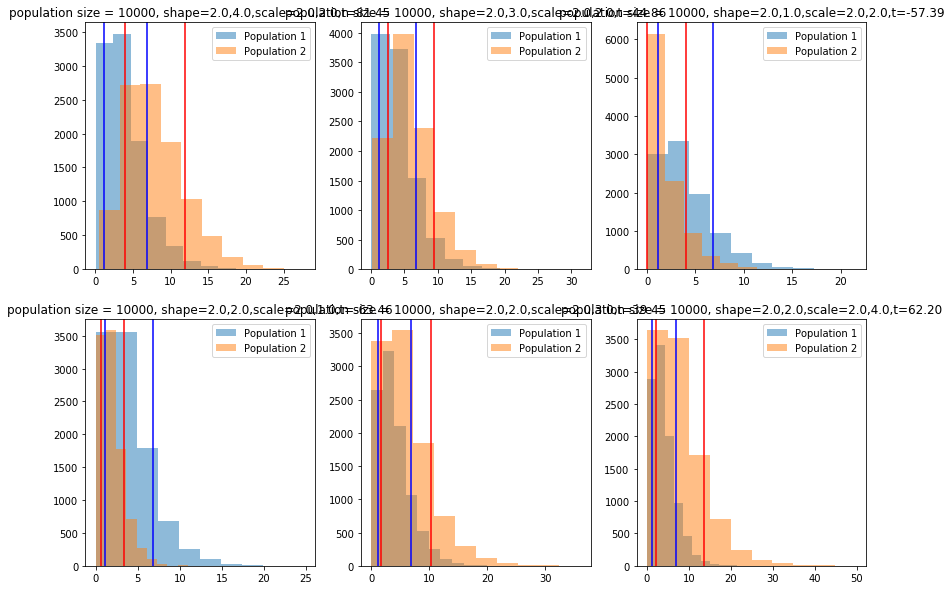

In [30]:

plt.subplot(2,3,1)
plot_gamma_disttest(nsamp=10000,shape1=2.,shape2=4.,scale1=2.,scale2=2.)
plt.subplot(2,3,2)
plot_gamma_disttest(nsamp=10000,shape1=2.,shape2=3.,scale1=2.,scale2=2.)

plt.subplot(2,3,3)
plot_gamma_disttest(nsamp=10000,shape1=2.,shape2=1.,scale1=2.,scale2=2.)

plt.subplot(2,3,4)
plot_gamma_disttest(nsamp=10000,shape1=2.,shape2=2.,scale1=2.,scale2=1.)

plt.subplot(2,3,5)
plot_gamma_disttest(nsamp=10000,shape1=2.,shape2=2.,scale1=2.,scale2=3.)

plt.subplot(2,3,6)
plot_gamma_disttest(nsamp=10000,shape1=2.,shape2=2.,scale1=2.,scale2=4.)

fig = plt.gcf()
fig.set_size_inches(14,10)

plt.show()

In [34]:
nsamp=10000
shape1=2.
shape2=2.
scale1=2.
scale2=2.1
pop1 = np.random.gamma(shape1, scale1, nsamp)
pop2 = np.random.gamma(shape2, scale2, nsamp)
ttest_ind(pop1, pop2, equal_var=False)


Ttest_indResult(statistic=-6.634537438489784, pvalue=3.338896059840609e-11)